# Overall introduction

In the first part, I cleaned the data and check the data quality from many aspects. Besides, I also performed visualization based on an outstanding reference.

In this part, I implement those data cleaning methods and function to get high quality data. Besides, since the target variable is extremely imbalanced based on part 1, I found some outstanding algorithms to handle that using advanced sampling technics.

In [4]:
import os 
path = os.path.abspath('../data/')
#path = os.path.abspath('./')
os.listdir(path)

['link for data sets.txt', 'sample_submission.csv', 'test.csv', 'train.csv']

In [5]:
import pandas as pd
train_df=pd.read_csv(path+'/train.csv')
test_df=pd.read_csv(path+'/test.csv')

# Delete outliers in trainning sets

If there is an outlier in one column, the whole row will be deleted.

The test set cannot be changed.

In [6]:
import numpy as np
def delete_outlier(df,times):
    '''
    df should be sub-df that only contains features with numeric values
    times is the in n*std
    return a list of bool values, shows whether we should keep columns
    '''
    upper = pd.DataFrame()
    upper = df.apply(lambda x: np.mean(x)+times*np.std(x), axis=0)
    lower = pd.DataFrame()
    lower = train_df_col.apply(lambda x: np.mean(x)-times*np.std(x), axis=0)
    tt = pd.concat([upper, lower], axis=1, keys=['upper_bound', 'lower_bound'])
    bound= np.transpose(tt)
    df_bound = pd.concat([df,bound],axis=0)
    df_bound_eliminate = pd.DataFrame(columns=df_bound.columns)
    for col in df_bound.columns:
        df_bound_eliminate.loc[:,col] = (df_bound.loc[:,col]>df_bound.loc['lower_bound',col])\
                                        & (df_bound.loc[:,col]<df_bound.loc['upper_bound',col])
    logic_value = df_bound_eliminate.apply(sum,axis=1)==df_bound.shape[1]
    return(logic_value)

In [7]:
train_df1 = train_df.copy()
train_df_col = train_df.iloc[:,2:]

print(train_df_col.shape[0])
train_df1_eliminate = train_df1[delete_outlier(train_df_col,3)]
print(train_df1_eliminate.shape)

train_df1_eliminate.reset_index(drop=True,inplace=True)

200000


C:\Users\Alan_\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


(188969, 202)


About 4.5% of data is deleted. It's not too much and 

For test data, make a copy of original data

In [8]:
test_df1 = test_df.copy()

# Drop duplicate rows in trainning data

The test data cannot be changed

In [9]:
train_df1_eliminate=train_df1_eliminate.drop_duplicates(keep='last')

In [10]:
train_df1_eliminate.shape

(188969, 202)

There is not duplicate row in the trainning data

# Scale both trainning and testing data

In [11]:
from sklearn.preprocessing import StandardScaler

def scale_train(df):
    '''
    df should be only with features and target variable in the first column
    '''
    # before concat, convect both to dataframe
    features = df.columns.values[1:]
    target = pd.DataFrame(df.iloc[:,0])
    feature_scaled = pd.DataFrame(StandardScaler().fit_transform(df.iloc[:,1:]),columns=features)
    df_scaled = pd.concat([target,feature_scaled],axis=1)
    return(df_scaled)

In [12]:
scaled_train_eliminate = scale_train(train_df1_eliminate.iloc[:,1:])

In [13]:
def scale_test(df):
    '''
    df should be only with features
    '''
    features = df.columns.values
    feature_scaled = pd.DataFrame(StandardScaler().fit_transform(df),columns=features)
    return(feature_scaled)

In [14]:
scaled_test = scale_test(test_df1.iloc[:,1:])

# Handle imbalance target variables

Just choose one from following three ways.
All the methods will be very time consuming.

All the reference are written in Chinese. Apologize for the potential inconvenience.

Reference:

Package handle imbalance data：
https://blog.csdn.net/kizgel/article/details/78553009
    
在之前的SMOTE方法中, 当由边界的样本与其他样本进行过采样差值时, 很容易生成一些噪音数据. 
因此, 在过采样之后需要对样本进行清洗. 这样, 第三节中涉及到的TomekLink 与 EditedNearestNeighbours方法就能实现上述的要求. 
所以就有了两种结合过采样与下采样的方法: (i) SMOTETomek and (ii) SMOTEENN.

There is a method of SMOTE/SMOTEENN to deal with the imbalance situation, here is the theory:
https://www.jianshu.com/p/13fc0f7f5565

http://www.360doc.com/content/17/0110/15/18144428_621538252.shtml

https://blog.csdn.net/together_cz/article/details/80002373

https://blog.csdn.net/nlpuser/article/details/81265614


ENN introduction:

https://blog.csdn.net/qq_39623150/article/details/80922511

Edited Nearest Neighbor (ENN)


Intro and comparison of these methods
https://blog.csdn.net/a358463121/article/details/52304670

https://blog.csdn.net/data_scientist/article/details/79003914

In [15]:
y_train = train_df1_eliminate.iloc[:,1]
X_train = scaled_train_eliminate.iloc[:,2:]

### SMOTE

I use this model to handle the imbalance since it's a little bit faster than the other two.

In [16]:
from collections import Counter   # Counter: count different situation
from imblearn.over_sampling import SMOTE
print('Original dataset shape {}'.format(Counter(y_train)))

# define SMOTE model
smo = SMOTE(random_state=233)
X_smo, y_smo = smo.fit_sample(X_train, y_train)

print('SMOTE dataset shape {}'.format(Counter(y_smo)))

Using TensorFlow backend.


Original dataset shape Counter({0: 170143, 1: 18826})
SMOTE dataset shape Counter({0: 170143, 1: 170143})


### SMOTEENN

In [ ]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=2333)
print('Original dataset shape {}'.format(Counter(y_train)))

X_smo_enn, y_smo_enn = smote_enn.fit_sample(X_train, y_train)
print('SMOTEENN dataset shape {}'.format(Counter(y_smo_enn)))

Original dataset shape Counter({0: 170143, 1: 18826})


### SMOTETomek

In [ ]:
from imblearn.combine import SMOTETomek
smote_tomek = SMOTEENN(random_state=2333)
print('Original dataset shape {}'.format(Counter(y_train)))

X_smo_to, y_X_smo_to = smote_tomek.fit_sample(X_train, y_train)
print('SMOTETomek dataset shape {}'.format(Counter(y_smo_to)))

# Baseline Model

## CV penalized logistic regression with gridsearch

Reference:

Gridsearch (Chinese)
:https://blog.csdn.net/u012897374/article/details/74999940

Precedure of trainning the model (Chinese): https://blog.csdn.net/u012897374/article/details/74999940

Gridsearch official doucument (English)    https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

Scoring function official doucument (English)：https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

### Train the model

The reason to use np.logspace rather than np.linspace()   https://blog.csdn.net/willduan1/article/details/78075334

numpy.logspace(): https://docs.scipy.org/doc/numpy/reference/generated/numpy.logspace.html

np.linspace(): https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_smo, y_smo, test_size=0.3, random_state=2333)

In [23]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold,StratifiedKFold

tuned_parameters = [{'penalty': ['l1'],
                        'C': np.logspace(-5,5)},
                     {'penalty': ['l2'],
                        'C': np.logspace(-5,5)}]

# cv with StratifiedKFold: StratifiedKFold make sure the distribution of different folds to be similar
# n_splits: number of folds
skf = StratifiedKFold(n_splits=5)
cross_validation = skf.get_n_splits(X_train, y_train.ravel())                 

lr = LogisticRegression(tol=0.01, solver='saga')
clf = GridSearchCV(lr, tuned_parameters, cv=cross_validation, scoring='roc_auc')  # use AUC value to be the standard
clf.fit(X_train, y_train.ravel())  
# .ravel() change to 1-d array
# XX.fit: use training data to tune the parameters
print("Best parameters set found on development set:\n {}".format(clf.best_params_))

Best parameters set found on development set:
 {'C': 1456.3484775012444, 'penalty': 'l1'}


### Fit the best model, predict label and corresponding probability

In [45]:
best_model = clf.best_estimator_
best_model.fit(X_train, y_train)
y_true = y_test
y_pred = best_model.predict(X_test)
y_pred_pro = best_model.predict_proba(X_test)

# show prob of each observation of class 0 and class 1
prob = pd.DataFrame(y_pred_pro, columns=best_model.classes_.tolist())

### Classification report

In [34]:
print(classification_report(y_true, y_pred, labels=None, target_names=None, sample_weight=None,digits=5))

              precision    recall  f1-score   support

           0    0.79951   0.78776   0.79359     51032
           1    0.79092   0.80254   0.79669     51054

    accuracy                        0.79515    102086
   macro avg    0.79522   0.79515   0.79514    102086
weighted avg    0.79522   0.79515   0.79514    102086



### Confusion matrix and visualization

In [39]:
# confusion_matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred, labels=[0,1])

array([[40201, 10831],
       [10081, 40973]], dtype=int64)

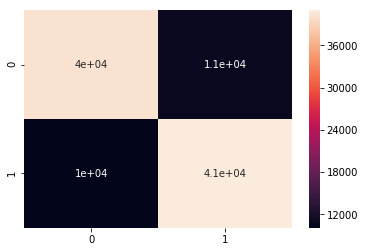

In [41]:
# confusion_matrix visualization
import matplotlib.pyplot as plt
import seaborn as sns
c2 = confusion_matrix(y_true, y_pred, labels=[0,1])
sns.heatmap(c2,annot=True)
plt.show()

### ROC curve and AUC value

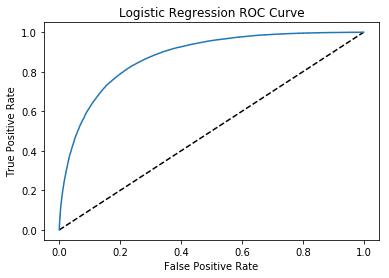

In [46]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
y_pred_prob = best_model.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

In [47]:
# AUC score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_prob)

0.8760643663398725

In [38]:
# AUC score
print('The AUC of baseline logistic regression model is {}'.format(round(clf.score(X_test, y_test),5)))

The AUC of baseline logistic regression model is 0.87606


# Save the best model, do prediction

I am pretty satisfied with the result. So I saved the best lr model and use it to generate a prediction

In [50]:
# Save the model to local
import joblib
current_path = os.path.abspath('./')
os.chdir(current_path)
joblib.dump(clf, "part2_penalized_lr.m")

# Load the saved model
clf = joblib.load("part2_penalized_lr.m")
best_model = clf.best_estimator_

Used the saved model to do prediction

In [51]:
y_predict = best_model.predict(scaled_test)

# create dataframe with index in test set
sub_df = pd.DataFrame({"ID_code":test_df["ID_code"].values})
sub_df["target"] = y_predict
sub_df.to_csv("part2_penalized_lr_prediction.csv", index=False)

sub_df.head()

,ID_code,target
0,test_0,1
1,test_1,1
2,test_2,0
3,test_3,0
4,test_4,1


# Save the processed data sets

In [18]:
y_smo_df = pd.DataFrame(y_smo,columns=['y'])
x_smo_df = pd.DataFrame(X_smo)
y_smo_df.reset_index(inplace=True)
x_smo_df.reset_index(inplace=True)

In [19]:
train_smo = pd.concat([y_smo_df.iloc[:,1:],x_smo_df.iloc[:,1:]], axis=1)    # axis=1 add column

In [20]:
train_smo.to_csv("train_smo.csv",index=False)

In [21]:
scaled_train_eliminate.to_csv("scaled_train_eliminate.csv",index=False)

In [22]:
scaled_test.to_csv("scaled_test.csv",index=False)

Finally, I move all there datasets to the data portfolio

## Result of submission

The score provided by kaggle for the baseline model is 0.64535